In [1]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 16})

In [2]:
import numpy as np

In [3]:
import phenom

In [4]:
from scrinet.interfaces import lalutils

In [5]:
from scrinet.analysis.timeseries import TimeSeries
from scrinet.analysis.frequencyseries import FrequencySeries
from scrinet.analysis import matchedfilter

In [6]:
import tensorflow as tf

# generate waveforms

In [7]:
# distance=1e6*lalutils.lal.PC_SI
distance=1

In [8]:
p = lalutils.gen_td_wf_params(m1=30, m2=30, f_min=10, distance=distance)
t, amp, phase = lalutils.gen_td_wf(p, t_min=None, t_max=100)
h = amp * np.exp(-1.j * phase)
hp = np.real(h)
hc = np.imag(h)
# convert time from M to s
t_s = phenom.MtoS(t, p['m1']+p['m2'])
dt = t_s[1] - t_s[0]

signal = TimeSeries(hp, t_s[1]-t_s[0], epoch=t_s[0])

Text(0.5, 0, 't/s')

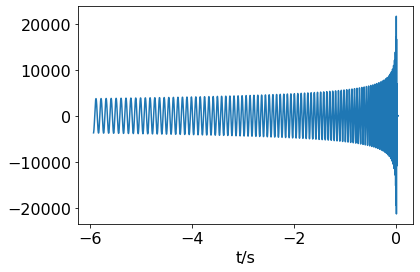

In [9]:
plt.figure()
plt.plot(signal.sample_times, signal.data)
plt.xlabel('t/s')

In [28]:
templates=[]
M_arr = np.linspace(55, 65, 100)
for M in M_arr:
    m1, m2 = phenom.m1_m2_M_q(M, q=1)
    p = lalutils.gen_td_wf_params(m1=m1, m2=m2, f_min=10, distance=distance)
    t, amp, phase = lalutils.gen_td_wf(p, t_min=None, t_max=100)
    h = amp * np.exp(-1.j * phase)
    hp = np.real(h)
    hc = np.imag(h)
    # convert time from M to s
    t_s = phenom.MtoS(t, p['m1']+p['m2'])
    dt = t_s[1] - t_s[0]

    template = TimeSeries(hp, dt, epoch=t_s[0])
    templates.append(template)

# compute match

In [29]:
matches = []
for i, template in enumerate(templates):
    print(f"working: {i}")
    np.testing.assert_almost_equal(signal.delta_t.numpy(), template.delta_t.numpy(), err_msg=f"{signal.delta_t.numpy()}, {template.delta_t.numpy()}")
    delta_t = signal.delta_t
    
    # need to zero pad to same length
    sig_shape = signal.data.shape[0]
    temp_shape = template.data.shape[0]
    new_len = np.max([sig_shape, temp_shape])
    
    arr_to_append = np.zeros(new_len-sig_shape)
    new_sig = TimeSeries(np.append(signal.data.numpy(), arr_to_append), delta_t=delta_t, epoch=signal._epoch)
    
    arr_to_append = np.zeros(new_len-temp_shape)    
    new_temp = TimeSeries(np.append(template.data.numpy(), arr_to_append), delta_t=delta_t, epoch=template._epoch)
    
    m = matchedfilter.match(new_sig, new_temp)
    matches.append(m)

working: 0
working: 1
working: 2
working: 3
working: 4
working: 5
working: 6
working: 7
working: 8
working: 9
working: 10
working: 11
working: 12
working: 13
working: 14
working: 15
working: 16
working: 17
working: 18
working: 19
working: 20
working: 21
working: 22
working: 23
working: 24
working: 25
working: 26
working: 27
working: 28
working: 29
working: 30
working: 31
working: 32
working: 33
working: 34
working: 35
working: 36
working: 37
working: 38
working: 39
working: 40
working: 41
working: 42
working: 43
working: 44
working: 45
working: 46
working: 47
working: 48
working: 49
working: 50
working: 51
working: 52
working: 53
working: 54
working: 55
working: 56
working: 57
working: 58
working: 59
working: 60
working: 61
working: 62
working: 63
working: 64
working: 65
working: 66
working: 67
working: 68
working: 69
working: 70
working: 71
working: 72
working: 73
working: 74
working: 75
working: 76
working: 77
working: 78
working: 79
working: 80
working: 81
working: 82
working: 83
wo

In [30]:
matches_arr = np.array([m.numpy() for m in matches])

In [31]:
matches_arr

array([0.31192319, 0.31524961, 0.31867311, 0.32220242, 0.32583193,
       0.32956933, 0.33341994, 0.33738326, 0.34146882, 0.34569967,
       0.35007186, 0.35459594, 0.35928246, 0.36412544, 0.36914213,
       0.3743607 , 0.37978326, 0.3854318 , 0.39131775, 0.39743333,
       0.40382485, 0.41051035, 0.41751622, 0.42487662, 0.43259096,
       0.44069691, 0.4492533 , 0.45829647, 0.46789113, 0.47805177,
       0.48884503, 0.50038008, 0.51273276, 0.52600175, 0.54026289,
       0.55568293, 0.57247687, 0.59078609, 0.61081825, 0.63289879,
       0.65742625, 0.68468558, 0.71508773, 0.74921769, 0.78680847,
       0.82779436, 0.87185404, 0.92419655, 0.97181562, 0.99649882,
       0.99647254, 0.97233903, 0.92599   , 0.87439788, 0.83171028,
       0.79213264, 0.7559889 , 0.72317108, 0.69395877, 0.66787483,
       0.64443646, 0.62329049, 0.60417889, 0.58680312, 0.57089629,
       0.55624578, 0.54272672, 0.53025403, 0.51868003, 0.50784884,
       0.49769262, 0.48820739, 0.47927789, 0.47088511, 0.46297

Text(0.5, 1.0, 'match vs total mass')

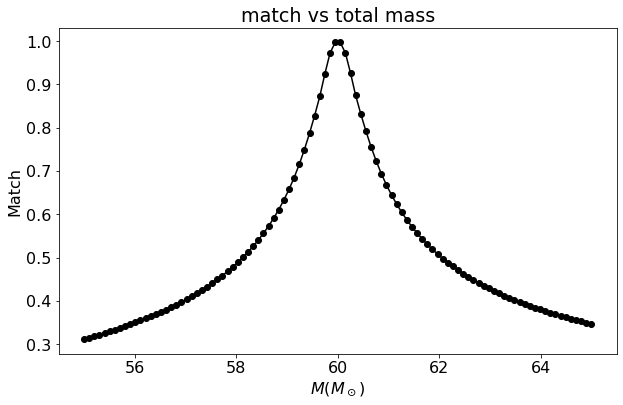

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(M_arr, matches_arr, 'k-o')
plt.xlabel(r"$M (M_\odot)$")
plt.ylabel("Match")
plt.title("match vs total mass")